# [E-02]Classification

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 1.손글씨 분류하기

In [3]:
digits = load_digits()
digits_data = digits.data
digits_label = digits.target


 ##### -load_digits을 통해 손글씨 빌트인 데이터셋을 불러온다  
 ##### -데이터셋에서 feature와 label을 분리하여 각각 변수 할당.

In [4]:
print(digits_data.shape) 
print(digits_data)
feature_names = digits['feature_names']
print(feature_names)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pi

### digits_data의 shpae를 확인 1797, 64
### feature name을 통해 어떤 특성이 있는지 확인하였으나 pixel의 이름만 들어있어 궁금증이 생김

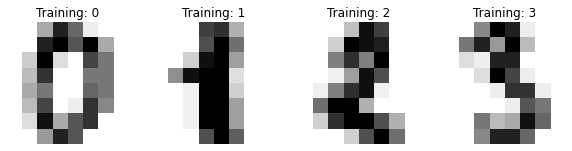

In [44]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

### 뽑아보니 0~9의 데이터가 들어가있었고 label이 잘 들어간것을 확인.

In [46]:
print(digits_label.shape)
print(digits_label)
print(digits.target_names)

(1797,)
[0 1 2 ... 8 9 8]
[0 1 2 3 4 5 6 7 8 9]


### label의 크기와 이름을 알수있다.
### 손글씨인 만큼 0~9로 지정

In [14]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size=0.2,
                                                   random_state=7)

print('number of X_train:', len(X_train), 'number of X_test:', len(X_test))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

number of X_train: 1437 number of X_test: 360
(1437, 64) (1437,)
(360, 64) (360,)


### 0.2는 test data로 0.8은 train data로 분리시킨다.

In [16]:
decision_tree = DecisionTreeClassifier(random_state=32)
random_forest = RandomForestClassifier(random_state=32)
svm_model = svm.SVC()
sgd_model = SGDClassifier()
logistic_model = LogisticRegression()

# 학습모델 할당과 학습
## 이후 평가치들을 확인할 수 있다.

In [28]:
decision_tree.fit(X_train, y_train)
y_pred_dicision_tree = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred_dicision_tree))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [29]:
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
print(classification_report(y_test, y_pred_random_forest))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



In [30]:
svm_model.fit(X_train, y_train)
y_pred_svm_model = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm_model))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [31]:
sgd_model.fit(X_train, y_train)
y_pred_sgd_model = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred_sgd_model))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.86      0.90      0.88        42
           2       0.97      0.97      0.97        40
           3       0.87      1.00      0.93        34
           4       0.93      1.00      0.96        37
           5       0.96      0.93      0.95        28
           6       1.00      0.93      0.96        28
           7       1.00      0.94      0.97        33
           8       0.90      0.84      0.87        43
           9       0.94      0.91      0.92        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



In [32]:
logistic_model.fit(X_train, y_train)
y_pred_logistic_model = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred_logistic_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 # 정확도
- Decision Tree: 86%
- Random Forest: 96%
- SVM: 99%
- SGD Classifier: 93%
- Logistic Regression: 95%
#### Decision Tree만 80%대이고 나머지는 90%대이다. 
#### SVM의 경우 99%라는 굉장히 높은 정확도를 보여줌
## 결과 :해당 프로젝트에서는 SVM을 사용하는것이 지향된다.
## 정확도로 판단한 이유는 정확히 숫자를 인식하는 것이 중요하다 생각했기 때문이다.

# 2.와인분류하기

In [35]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_data = wine.data
wine_label = wine.target

In [41]:
print(wine_data.shape)
print(wine_data)
feature_names = wine['feature_names']
print(feature_names)

(178, 13)
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


### 178개의 데이터와 13개의 특성이 있는것을 확인
### 특성 :alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'

In [43]:
print(wine_label.shape)
print(wine_label[:])
print(wine.target_names)

(178,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['class_0' 'class_1' 'class_2']


### 와인 라벨의 데이터 모양을 알수있다.
### target_names를 통해 와인이 3가지로 분류됨을 알 수 있다.
## 밑 부분부턴 digits에서와 같이 데이터 분리와 학습이다.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(wine_data,
                                                   wine_label,
                                                   test_size=0.2,
                                                   random_state=7)

print('number of X_train:', len(X_train), 'number of X_test:', len(X_test))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

number of X_train: 142 number of X_test: 36
(142, 13) (142,)
(36, 13) (36,)


In [54]:
decision_tree.fit(X_train, y_train)
y_pred_dicision_tree = decision_tree.predict(X_test)
print("Decision_tree")
print(classification_report(y_test, y_pred_dicision_tree))
print("Random_forest")
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
print(classification_report(y_test, y_pred_random_forest))
print("Svm")
svm_model.fit(X_train, y_train)
y_pred_svm_model = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm_model))
print("Sgd")
sgd_model.fit(X_train, y_train)
y_pred_sgd_model = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred_sgd_model))
print("logistic")
logistic_model.fit(X_train, y_train)
y_pred_logistic_model = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred_logistic_model))




Decision_tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

Random_forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Svm
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 정확도
- Decision Tree: 94%
- Random Forest: 100%
- SVM: 61%
- SGD Classifier: 71%
- Logistic Regression: 97%. 
#### SVM과 SGD는 71%이하로 확실히 좋아 보이지 않는다.
#### random forest는 100프로로 아주 훌륭한 성과를 보임
## 결과 :와인 분류에서는 randdom을 사용하는것이 지향된다.
## 정확도로 판단한 이유는 와인을 정확히 인식하는것이 중요하다고 생각해서이다.

In [56]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_label = cancer.target

In [57]:
print(cancer_data.shape)
print(cancer_data)
feature_names = cancer['feature_names']
print(feature_names)

(569, 30)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


- 569개의 데이터와 특성이 30개가 있다는 것을 확인할 수 있다.
- 암을 학습하는 만큼 특성이 많아야 될것같긴 하다.

In [58]:
print(cancer_label.shape)
print(cancer_label[:])
print(cancer.target_names)

(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0

- 레이블의 모양 확인
- 레이블의 값이 0,1로 구분
- 유방암이냐 아니냐로 타겟이 구분된다.

In [59]:
decision_tree.fit(X_train, y_train)
y_pred_dicision_tree = decision_tree.predict(X_test)
print("Decision_tree")
print(classification_report(y_test, y_pred_dicision_tree))
print("Random_forest")
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
print(classification_report(y_test, y_pred_random_forest))
print("Svm")
svm_model.fit(X_train, y_train)
y_pred_svm_model = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm_model))
print("Sgd")
sgd_model.fit(X_train, y_train)
y_pred_sgd_model = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred_sgd_model))
print("logistic")
logistic_model.fit(X_train, y_train)
y_pred_logistic_model = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred_logistic_model))



Decision_tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

Random_forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Svm
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 해당 데이터는 정확도보다, Recall 값이 중요한 예제
###  Recall(재현율)은 실제로 True인 데이터를 모델이 True라고 인식한 데이터의 수입니다. 위의 예시에서 recall은 암 환자를 진짜로 암환자로 인시간 데이터수가 중요하기 때문에 중요하다.

- Recall 값을 확인하는 것이 중요
- Random Forest를 제외한 나머지 모델에서는 Recall 값이 0.72~0.82 사이의 값을 갖는 것으로 확인

## 즉 Random Forest가 유방암 검출 모델로 지향된다고 생각한다.

# 회고

## 분류 모델 성능 평가 지표 - Confusion Matrix
![pooh](https://www.researchgate.net/profile/Sebastian-Bittrich/publication/330174519/figure/fig1/AS:711883078258689@1546737560677/Confusion-matrix-Exemplified-CM-with-the-formulas-of-precision-PR-recall-RE.png)
- confusion matrix를 통해서 평가점수인 precision, recall,f1-score, accuracy 지표들을 얻을 수 있다.

#### 정확도(accuracy)는 전체 샘플 중 맞게 예측한 샘플 수의 비율을 뜻한다. 높을수록 좋은 모형이다. 일반적으로 학습에서 최적화 목적함수로 사용된다.
- accuracy=TP+TNTP+TN+FP+FN
#### 정밀도(precision)은 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율을 말한다. 높을수록 좋은 모형이다. FDS의 경우, 사기 거래라고 판단한 거래 중 실제 사기 거래의 비율이 된다.
- precision=TPTP+FP
#### 재현율(recall)은 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율을 뜻한다. 높을수록 좋은 모형이다. FDS의 경우 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율이 된다. TPR(true positive rate) 또는 민감도(sensitivity)라고도 한다.
- recall=TPTP+FN
#### 위양성율(fall-out)은 실제 양성 클래스에 속하지 않는 표본 중에 양성 클래스에 속한다고 출력한 표본의 비율을 말한다. 다른 평가점수와 달리 낮을수록 좋은 모형이다. FDS의 경우에는 실제로는 정상 거래인데 FDS가 사기 거래라고 예측한 거래의 비율이 된다. FPR(false positive rate)또는 1에서 위양성률의 값을 뺀 값을 특이도(specificity)라고도 한다.
- fallout=FPFP+TN
#### F-score 정밀도와 재현율의 가중조화평균(weight harmonic average)을 F점수(F-score)라고 한다. 정밀도에 주어지는 가중치를 베타(beta)라고 한다.
- Fβ=(1+β2)(precision×recall)/(β2precision+recall) 베타가 1인 경우를 특별히 F1점수라고 한다.

### 이러한 다양한 모델성능평가지표로 필요에 따라 관점을 달리해 원하는 데이터를 얻을 수 있다는 것을 배웠다.
